In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


#1 Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
# print(df.head(10))

#2 Show the number of attributes (columns) and number of records (rows)
num_attributes = df.shape[1]
num_records = df.shape[0]
print('Number of attributes:', num_attributes)
print('Number of records:', num_records)


#3 Show the statistics of the dataset ( column wise mean, standard deviation, max,min etc)
statistics = df.describe(include='all')
print(statistics)


#4 Count the number of missing values in the dataset
missing_values = df.isnull().sum()
print('Missing values:', missing_values)

#5 Count the number of duplicate values in the dataset
num_duplicates = df.duplicated()
print('Number of duplicates:', num_duplicates)


Number of attributes: 35
Number of records: 1470
                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          

In [95]:
#1 If you find any missing values in the dataset ( nan values) replace those data with the column wise mean.
df.fillna(df.mean(numeric_only=True), inplace=True)

#2 If you find any duplicates in the dataset, keep just one copy of the data.
df = df.drop_duplicates()


#3 Remember, if any row in the target column (Attrition) is missing, you must drop that row
df = df.dropna(subset=['Attrition'])


In [96]:
#1 You need to split the data into two parts. The “Features” variable will consist of all the columns in the dataset except the target column. And the “Labels” variable will contain only the column.
target_column = 'Attrition'

# Create the Features (input variables) and Labels (target variable)
X = df.drop(columns=[target_column])  # Features: all columns except the target column
y = df[target_column]                 # Labels: the target column

# Display the shapes of the Features and Labels
# print(f'Shape of Features (X): {X.shape}')
# print(f'Shape of Labels (y): {y.shape}')
# print(y.head())
# print(X.head())

In [97]:
# Display non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print('Non-numeric columns:', non_numeric_columns)


label_encoder = LabelEncoder()

#Perform one-hot encoding for the non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_columns)

# perform one-hot encoding for the target column
y = label_encoder.fit_transform(y)


# Display the shapes of the Features and Labels
print(f'Shape of Features (X): {X.shape}')
print(f'Shape of Labels (y): {y.shape}')

# display the first 5 rows of the Features
print(X.head(5))
print(y[:5])
print(X.columns)


Non-numeric columns: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Shape of Features (X): (1470, 55)
Shape of Labels (y): (1470,)
   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         

In [98]:
# scale the Features 

# scaler = StandardScaler()
# scaled_x = scaler.fit_transform(X)

scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X)

X = pd.DataFrame(scaled_x, columns=X.columns)

df = pd.concat([X, pd.DataFrame(y, columns=[target_column])], axis=1)


# Display the first 5 rows of the scaled Features
print(X.head(5))


        Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.547619   0.715820          0.000000       0.25            0.0   
1  0.738095   0.126700          0.250000       0.00            0.0   
2  0.452381   0.909807          0.035714       0.25            0.0   
3  0.357143   0.923407          0.071429       0.75            0.0   
4  0.214286   0.350036          0.035714       0.00            0.0   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0        0.000000                 0.333333    0.914286        0.666667   
1        0.000484                 0.666667    0.442857        0.333333   
2        0.001451                 1.000000    0.885714        0.333333   
3        0.001935                 1.000000    0.371429        0.666667   
4        0.002903                 0.000000    0.142857        0.666667   

   JobLevel  ...  JobRole_Research Director  JobRole_Research Scientist  \
0      0.25  ...                        0.0                


Top 20 features with the highest correlation with Attrition: ['OverTime_Yes', 'OverTime_No', 'MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement', 'BusinessTravel_Travel_Frequently', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobRole_Laboratory Technician', 'MaritalStatus_Married', 'JobRole_Research Director', 'MaritalStatus_Divorced']


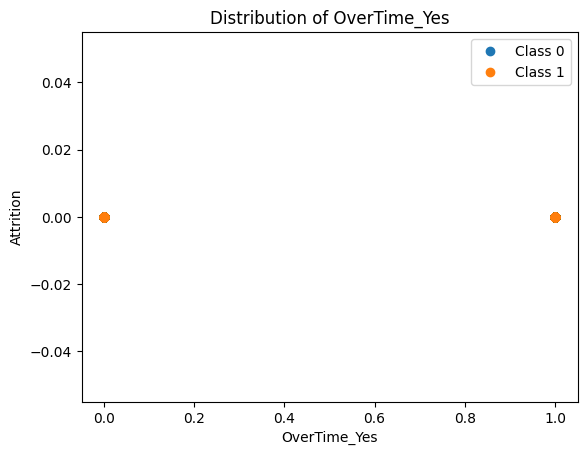

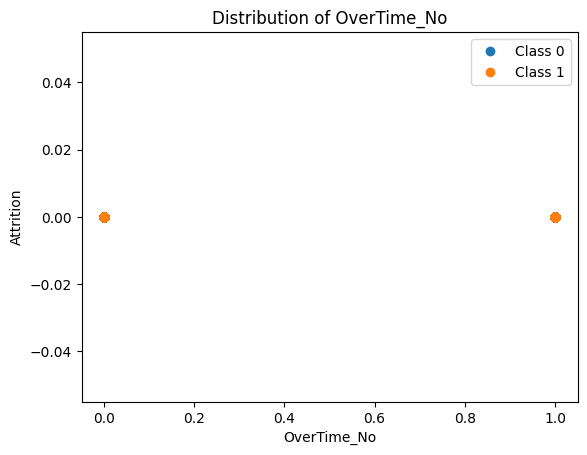

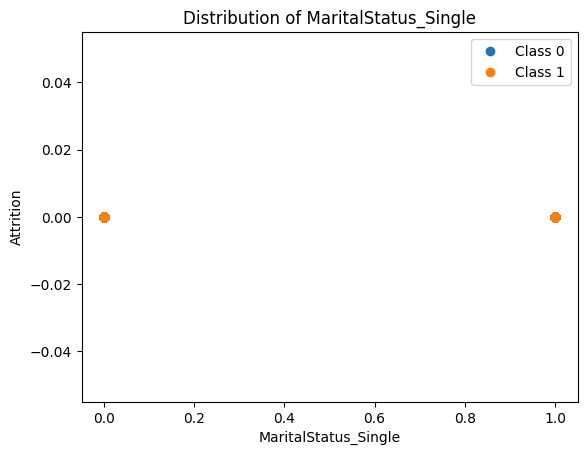

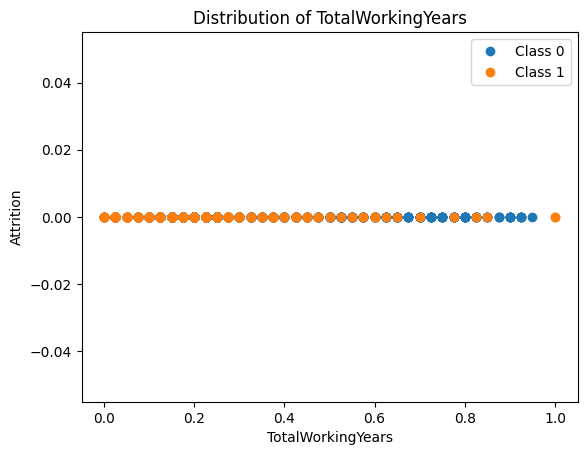

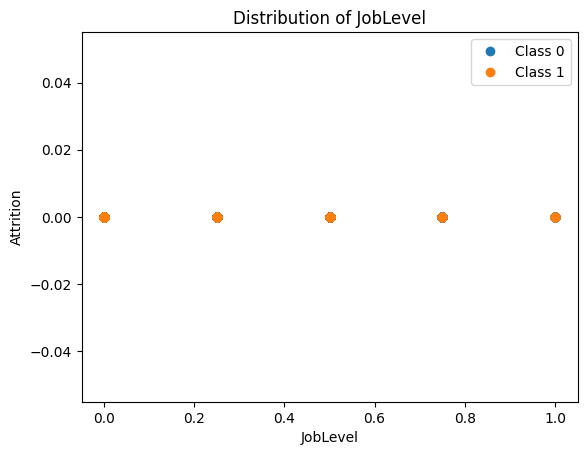

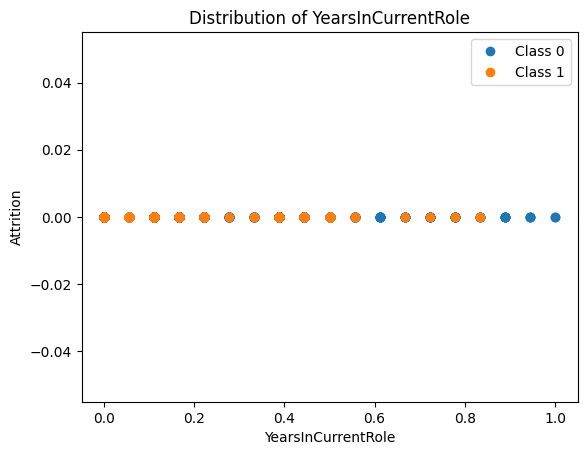

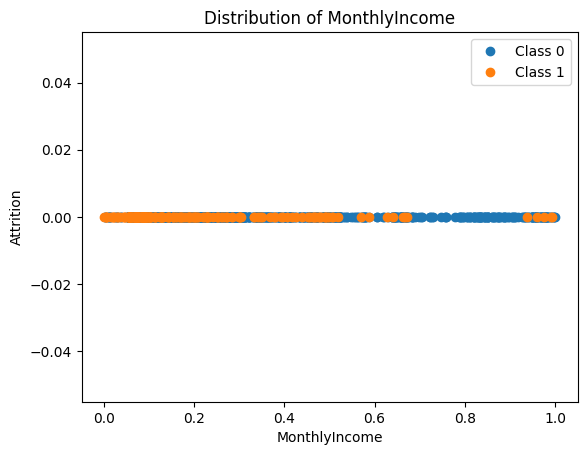

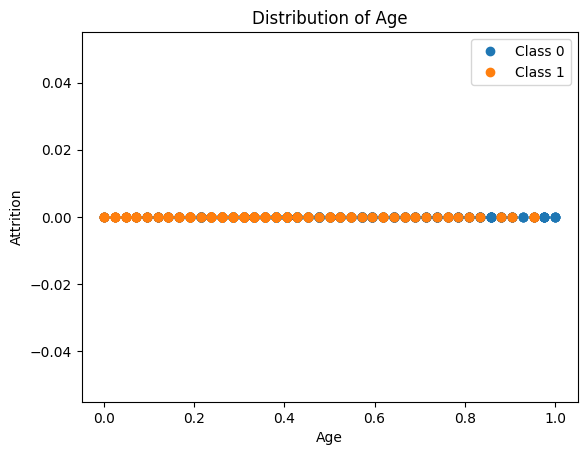

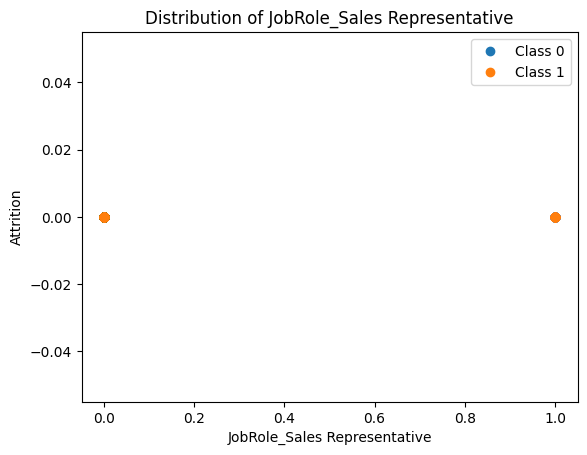

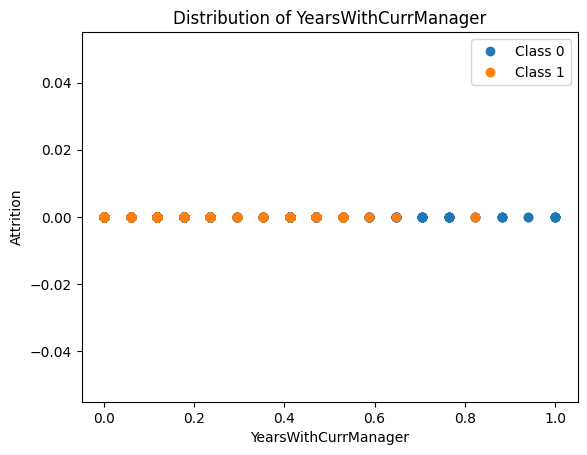

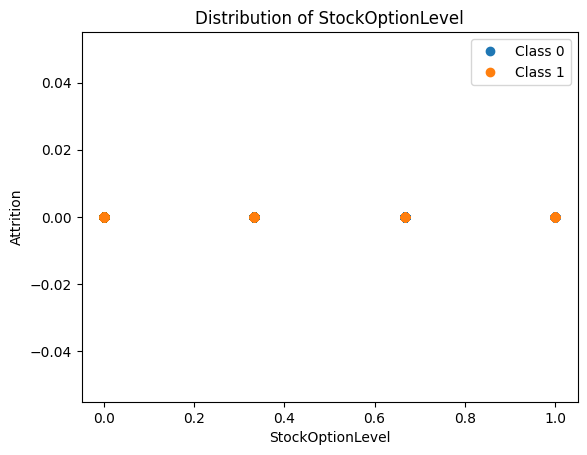

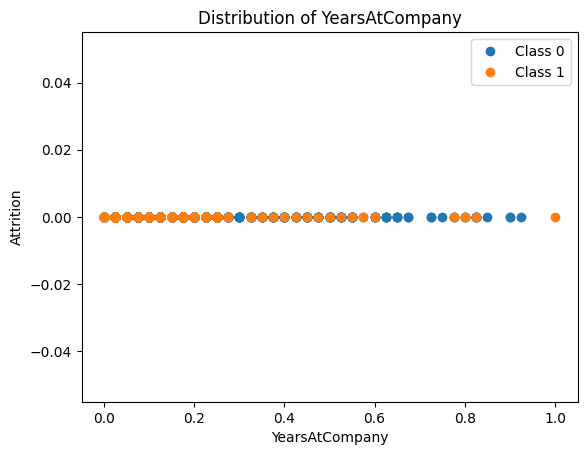

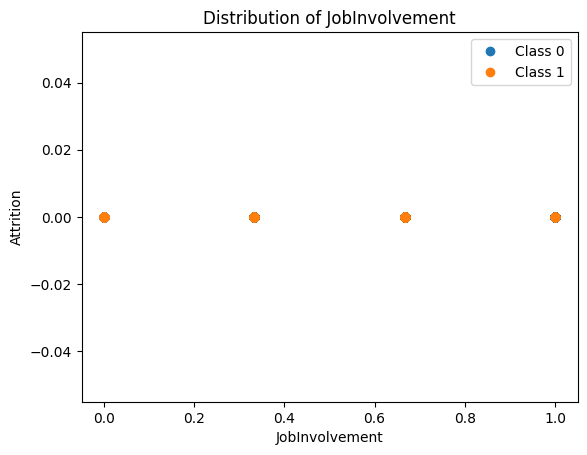

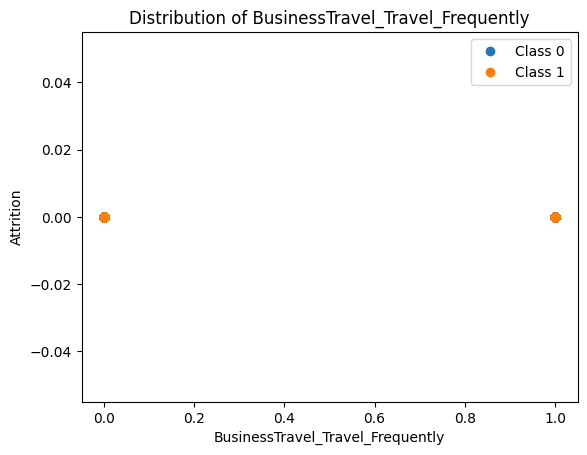

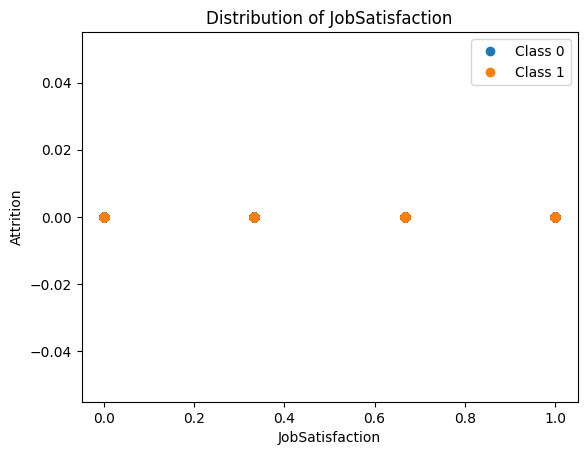

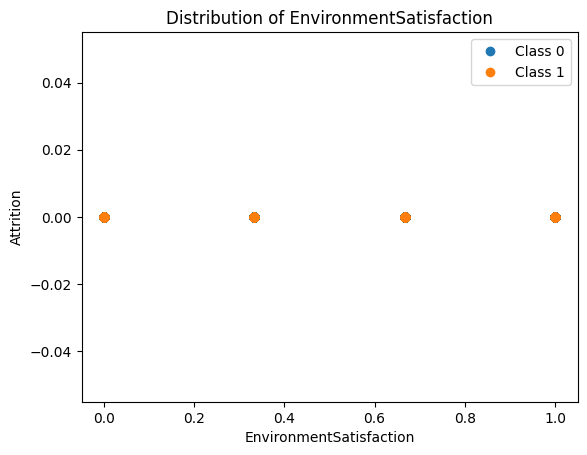

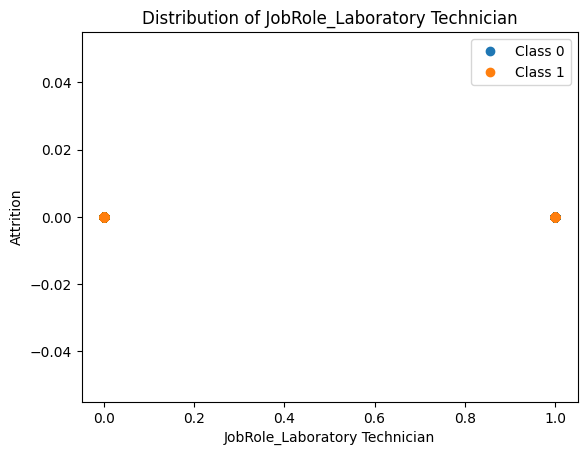

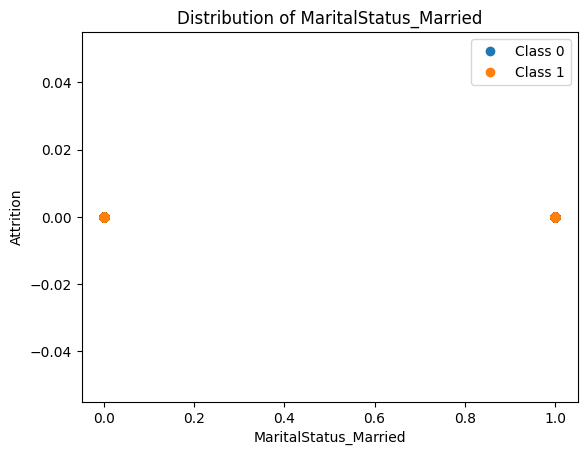

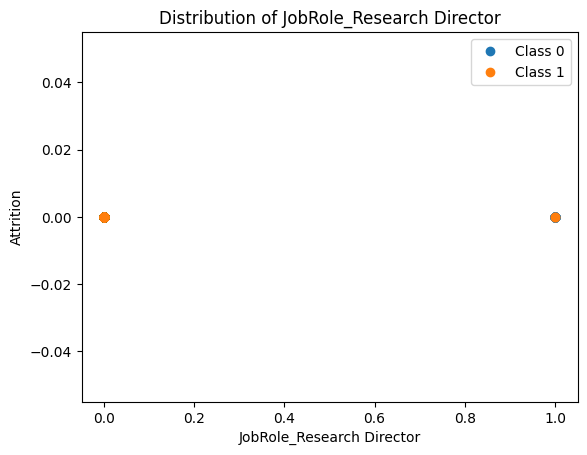

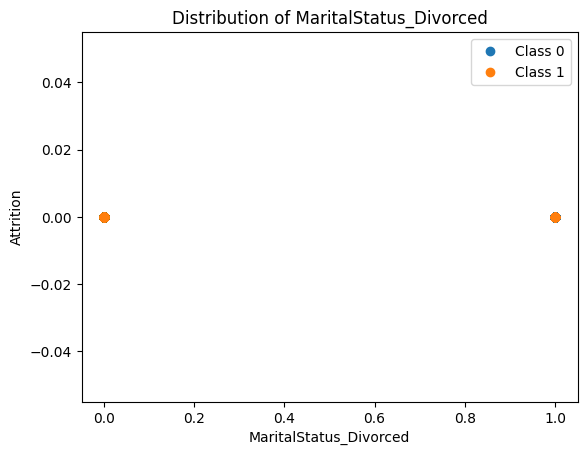

In [99]:
# Perform correlation analysis
correlation_matrix = df.corr()

# Show correlation with the target variable which is the last column 
correlation_with_target = correlation_matrix.iloc[-1].sort_values(ascending=False)
# print(f"\nCorrelation with the target variable (Attrition):\n{correlation_with_target}")

# pick best 20 features with absolute correlation
top_20_features = correlation_with_target.abs().sort_values(ascending=False).index[1:21]
print(f"\nTop 20 features with the highest correlation with Attrition: {list(top_20_features)}")

class_0 = df.loc[df["Attrition"] == 0]
class_1 = df.loc[df["Attrition"] == 1]

for feature in top_20_features:

    plt.plot(class_0[feature], np.zeros_like(class_0[feature]), 'o', label='Class 0')
    plt.plot(class_1[feature], np.zeros_like(class_1[feature]), 'o', label='Class 1')
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('Attrition')
    plt.title('Distribution of ' + feature)
    plt.show()

In [100]:
# Assume X and y are your input matrices
# X --> (number of rows, number of columns), already scaled
# y --> binary target class (0 or 1)
# Dummy example data (replace these with your actual data)
# X = np.random.rand(100, 5) # Example feature matrix with 100 rows and 5 columns
# y = np.random.randint(0, 2, 100) # Example binary target vector
# Step 1: Split the data into training and testing sets


# use best 20 features
# X = df[top_20_features]
# y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 2: Initialize the Logistic Regression classifier
clf = LogisticRegression()
# Step 3: Train the classifier on the training data
clf.fit(X_train, y_train)
# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)
# Step 5: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

Accuracy of Logistic Regression classifier: 0.89
